In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import const
from graphs import C_SCALE
from read import read_data, read_passfail

In [74]:
data = read_data()
data.index = data['date']
data.drop(['date',
           *const.COLS_SHOULDER_RAISES[:-1],
           *const.COLS_EATING[-2:],
           const.COLS_SLEEPING[-1],
           const.COLS_READING[-1],
           const.COLS_EXERCISE[-1],
          ], axis=1, inplace=True)
data.head()

,week_day,working,out_of_home,energy,side_projects_time,read_book_time,read_crossword_time,sleep_night_time,sleep_day_time,phone_time,...,exercise_swim_time,exercise_run_time,exercise_dance_time,macros_protein,macros_carbs,macros_fat,macros_alcohol,published_medium,published_linkedin,exercise_shoulder_raises_volume
date,,,,,,,,,,,,,,,,,,,,,
2024-10-01,1,True,False,3,15,0,20,420,0,212,...,0,0,0,106.0,190.0,71.0,0.0,0,0,0.0
2024-10-02,2,True,False,1,60,0,15,360,0,319,...,0,0,0,113.0,372.0,138.0,0.0,0,0,0.0
2024-10-03,3,True,False,3,60,0,15,450,0,191,...,0,0,0,120.0,310.0,118.0,0.0,0,0,0.0
2024-10-04,4,True,False,1,30,0,25,300,180,270,...,60,0,0,87.0,281.0,75.0,0.0,0,0,0.0
2024-10-05,5,False,True,3,120,0,10,360,0,64,...,0,0,0,72.0,280.0,95.0,14.0,0,0,0.0


In [47]:
passfail = read_passfail()
passfail.index = passfail['date']
passfail.drop(['date', const.COLS_SLEEPING[-1], const.COLS_EATING[-1]], axis=1, inplace=True)
passfail.head()

,sleep_night_time,sleep_day_time,read_total_time,side_projects_time,phone_time,tv_time,exercise_total_time,exercise_shoulder_raises_volume,macros_kcal
date,,,,,,,,,
2024-10-01,True,True,True,True,True,True,True,False,False
2024-10-02,False,True,True,True,False,True,True,False,False
2024-10-03,True,True,True,True,True,True,True,False,True
2024-10-04,False,False,True,True,False,True,True,False,False
2024-10-05,False,True,True,True,True,True,False,False,False


### Daily values

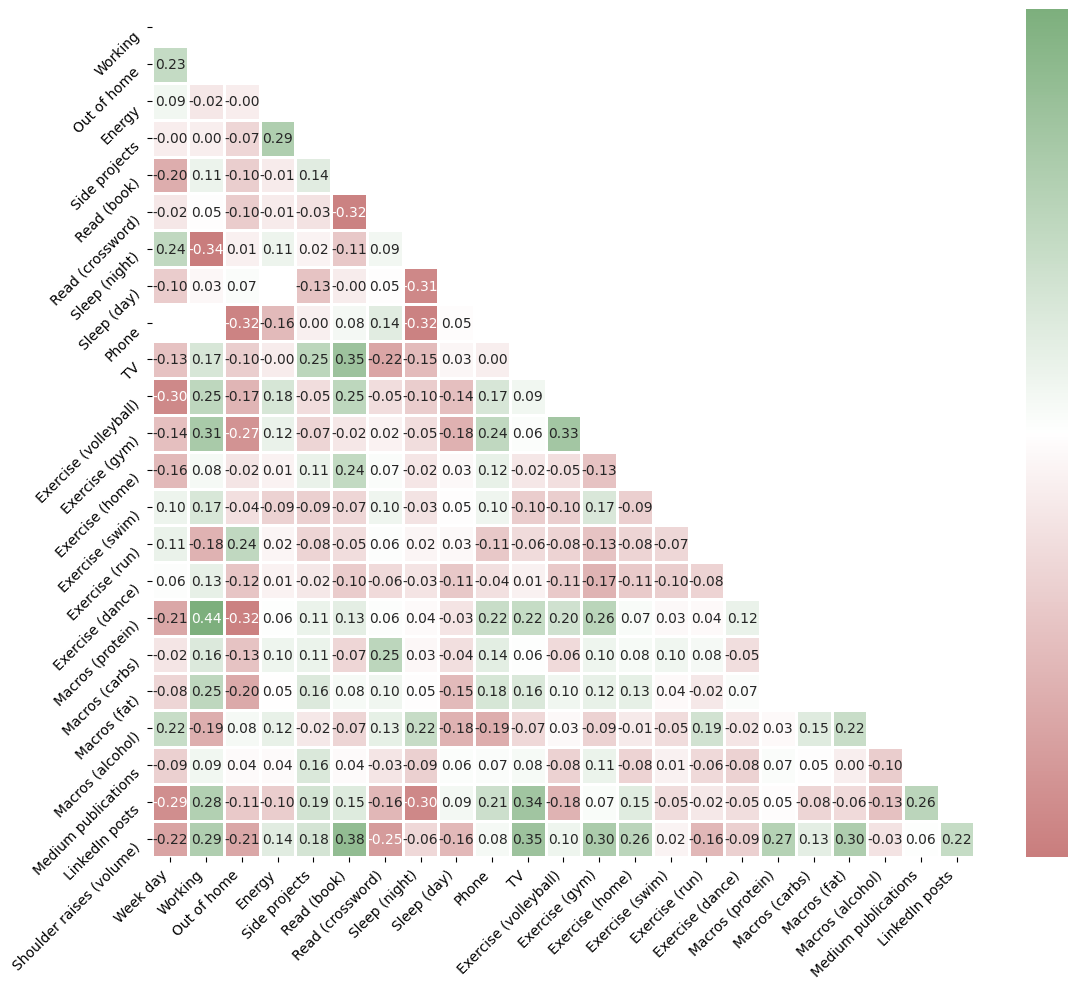

In [ ]:
corr = data.corr(method='spearman')
np.fill_diagonal(corr.values, np.nan)
corr = corr.mask(np.triu(np.ones(corr.shape), k=0).astype(bool))
corr = corr.iloc[1:, :-1]

# # hide top values, skewing the result color bar
# corr.iloc[0, 0] = np.nan
# corr.iloc[1, 1] = np.nan
# corr.iloc[7, 3] = np.nan
# corr.iloc[8, 0] = np.nan
# corr.iloc[8, 1] = np.nan
# corr.iloc[17, 17] = np.nan
# corr.iloc[18, 17] = np.nan
# corr.iloc[18, 18] = np.nan

fig, ax = plt.subplots(figsize=(12, 10))
colors = [C_SCALE[0], 'white', C_SCALE[-1]]
cmap = mcolors.LinearSegmentedColormap.from_list("smooth_cmap", colors)
sns.heatmap(corr, ax=ax,
            annot=True, fmt=".2f",
            cmap=cmap, cbar=True, cbar_kws={'ticks': []},
            linewidths=1, linecolor='white')
labels = ['Week day', 'Working', 'Out of home', 'Energy', 'Side projects',
    'Read (book)', 'Read (crossword)', 'Sleep (night)', 'Sleep (day)', 'Phone', 'TV',
    'Exercise (volleyball)', 'Exercise (gym)', 'Exercise (home)', 'Exercise (swim)', 'Exercise (run)', 'Exercise (dance)',
    'Macros (protein)', 'Macros (carbs)', 'Macros (fat)', 'Macros (alcohol)',
    'Medium publications', 'LinkedIn posts', 'Shoulder raises (volume)']
ax.set_xticklabels(labels[:-1], rotation=45, ha='right')
ax.set_yticklabels(labels[1:], rotation=45, va='top')
fig.tight_layout()
plt.show()

### Daily passrates

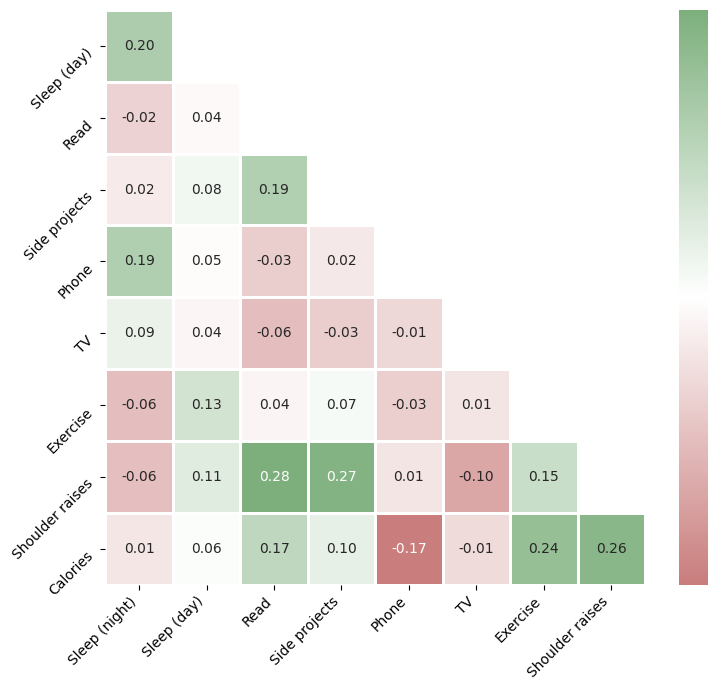

In [77]:
corr = passfail.corr(method='pearson')
np.fill_diagonal(corr.values, np.nan)
corr = corr.mask(np.triu(np.ones(corr.shape), k=0).astype(bool))
corr = corr.iloc[1:, :-1]

fig, ax = plt.subplots(figsize=(8, 7))
colors = [C_SCALE[0], 'white', C_SCALE[-1]]
cmap = mcolors.LinearSegmentedColormap.from_list("smooth_cmap", colors)
sns.heatmap(corr, ax=ax,
            annot=True, fmt=".2f",
            cmap=cmap, cbar=True, cbar_kws={'ticks': []},
            linewidths=1, linecolor='white')
labels = ['Sleep (night)', 'Sleep (day)', 'Read', 'Side projects', 'Phone', 'TV', 'Exercise', 'Shoulder raises', 'Calories']
ax.set_xticklabels(labels[:-1], rotation=45, ha='right')
ax.set_yticklabels(labels[1:], rotation=45, va='top')
fig.tight_layout()
plt.show()